### Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mplsoccer import VerticalPitch

In [29]:
df = pd.read_csv('datasets/haaland.csv')

df.head(10)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass
5,480318,44,SavedShot,0.933,0.707,0.084546,Erling Haaland,h,8260,OpenPlay,2022,LeftFoot,18214,Manchester City,Bournemouth,4,0,2022-08-13 14:00:00,João Cancelo,Chipped
6,480325,72,MissedShots,0.905,0.575,0.136635,Erling Haaland,h,8260,OpenPlay,2022,LeftFoot,18214,Manchester City,Bournemouth,4,0,2022-08-13 14:00:00,Jack Grealish,Pass
7,482576,51,SavedShot,0.822,0.606,0.055626,Erling Haaland,a,8260,OpenPlay,2022,RightFoot,18230,Newcastle United,Manchester City,3,3,2022-08-21 15:30:00,Rúben Dias,TakeOn
8,482581,59,Goal,0.967,0.567,0.541526,Erling Haaland,a,8260,FromCorner,2022,LeftFoot,18230,Newcastle United,Manchester City,3,3,2022-08-21 15:30:00,Rodri,Pass
9,482582,61,SavedShot,0.866,0.443,0.339789,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18230,Newcastle United,Manchester City,3,3,2022-08-21 15:30:00,Kevin De Bruyne,Throughball


In [3]:
# Turn X and Y to normal scale

df['X'] = df['X']*100
df['Y'] = df['Y']*100

df.head(2)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,93.599998,50.299999,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,88.500000,50.000000,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard


#### Create metrics

In [4]:
total_shots = df.shape[0]
total_shots

123

In [5]:
total_goals = df[df['result'] == 'Goal'].shape[0]

total_goals

36

In [6]:
total_xG = df['xG'].sum()
total_xG

np.float64(32.76137728616595)

In [7]:
xG_per_shot = total_xG / total_shots
xG_per_shot

np.float64(0.2663526608631378)

In [8]:
points_average_distance = df['X'].mean() #Average shot distance
actual_average_distance = 120 - (df['X']*1.2).mean()  #Generally 120 

#### Plotting

In [42]:
background_color = '#FED215'
font_color = '#FFFCF7'
goal_color = '#2d98da'

In [43]:
font_path = 'Arvo/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

In [44]:
team_logo_path = 'logo/man_city_logo.png'
logo = mpimg.imread(team_logo_path)

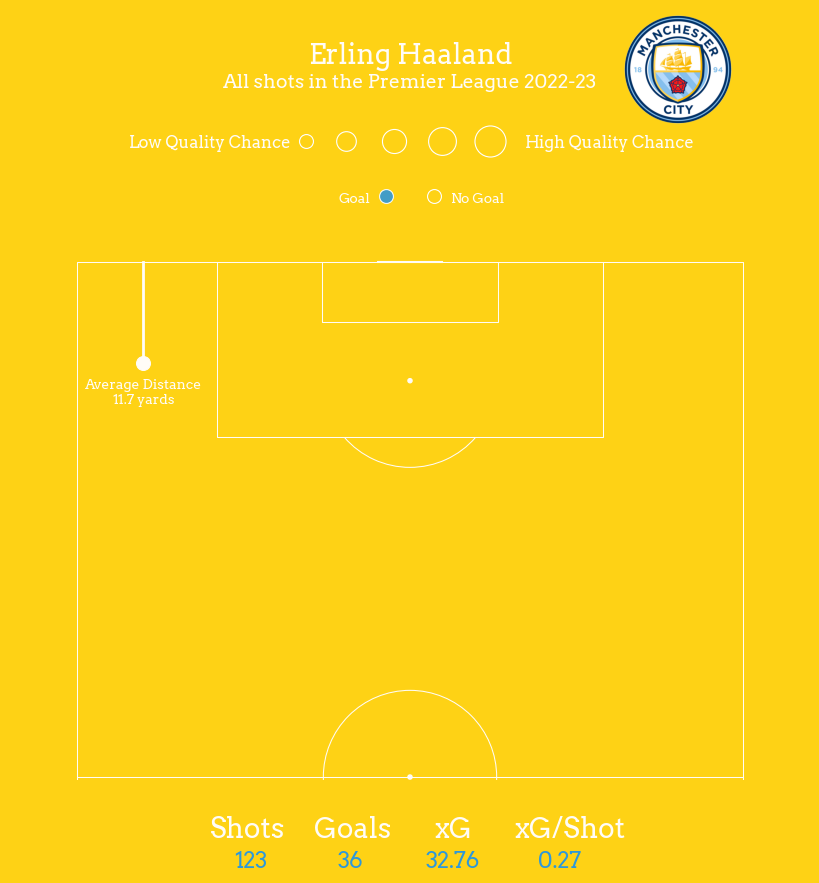

In [45]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0,.7,1,.2]) #Left Corner, Bottom Corner, Width, Height 
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)


ax1.text(
    x=.5,
    y=.85,
    s='Erling Haaland',
    fontsize=20,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=.5,
    y=.75,
    s='All shots in the Premier League 2022-23',
    fontsize=14,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=.25,
    y=.5,
    s='Low Quality Chance',
    fontsize=12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.42,
    y=.53,
    s=200,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.48,
    y=.53,
    s=300,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.54,
    y=.53,
    s=400,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.6,
    y=.53,
    s=500,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color=font_color, 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color=goal_color, 
    edgecolor='white', 
    linewidth=.8,
    alpha=.9
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color=font_color, 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05,.25, .9, .5]) 
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type= 'opta',
    half= True,
    pitch_color= background_color,
    pad_bottom=.5,
    line_color= font_color,
    linewidth= .75,
    axis=True,
    label= True
)

pitch.draw(ax=ax2)

ax2.scatter(x=90, y=points_average_distance, s=100,
            color=font_color, linewidth=.8)

ax2.plot([90,90], [100, points_average_distance], color =font_color, linewidth=2)

ax2.text(x=90, y=points_average_distance-4,
         s=f'Average Distance\n{actual_average_distance:.1f} yards',
         fontsize=10, fontproperties= font_props,
         color= font_color, ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color = goal_color if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth = .8,
        edgecolor = font_color
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0,.2, 1, .05]) 
ax3.set_facecolor(background_color)

ax3.text(x=.25, y=.5, s='Shots', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.28, y=0, s=f'{total_shots}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.38, y=.5, s='Goals', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.41, y=0, s=f'{total_goals}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.53, y=.5, s='xG', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.52, y=0, s=f'{total_xG:.2f}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.63, y=.5, s='xG/Shot', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.66, y=0, s=f'{xG_per_shot:.2f}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.set_axis_off()


ax4 = fig.add_axes([0.71, 0.815, 0.25, 0.1])  
ax4.set_axis_off()  

# Display the image
ax4.imshow(logo)

Türkçe

In [39]:
actual_average_distance_meter = actual_average_distance*0.9144

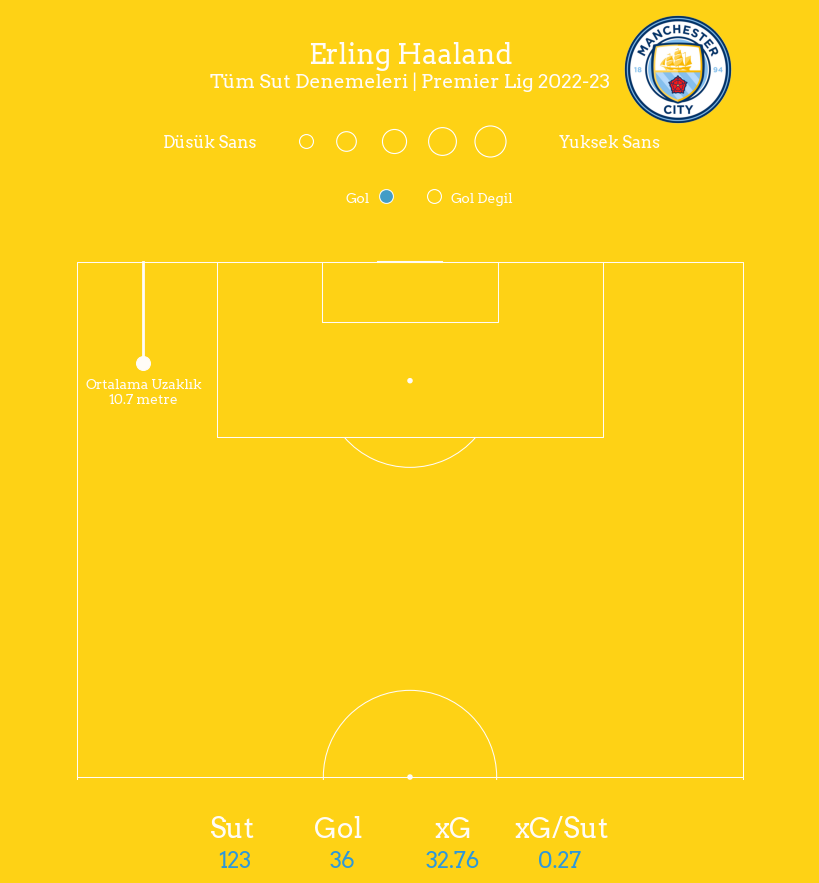

In [49]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0,.7,1,.2]) #Left Corner, Bottom Corner, Width, Height 
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)


ax1.text(
    x=.5,
    y=.85,
    s='Erling Haaland',
    fontsize=20,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=.5,
    y=.75,
    s='Tüm Sut Denemeleri | Premier Lig 2022-23',
    fontsize=14,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=.25,
    y=.5,
    s='Düsük Sans',
    fontsize=12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.42,
    y=.53,
    s=200,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.48,
    y=.53,
    s=300,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.54,
    y=.53,
    s=400,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.scatter(
    x=.6,
    y=.53,
    s=500,
    color=background_color,
    edgecolor= 'white',
    linewidth= 0.8

)

ax1.text(
    x=.75,
    y=.5,
    s='Yuksek Sans',
    fontsize=12,
    fontproperties = font_props,
    fontweight = 'bold',
    color = font_color,
    ha= 'center'

)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Gol', 
    fontsize=10, 
    fontproperties=font_props, 
    color=font_color, 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color=goal_color, 
    edgecolor='white', 
    linewidth=.8,
    alpha=.9
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'Gol Degil', 
    fontsize=10, 
    fontproperties=font_props, 
    color=font_color, 
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05,.25, .9, .5]) 
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type= 'opta',
    half= True,
    pitch_color= background_color,
    pad_bottom=.5,
    line_color= font_color,
    linewidth= .75,
    axis=True,
    label= True
)

pitch.draw(ax=ax2)

ax2.scatter(x=90, y=points_average_distance, s=100,
            color=font_color, linewidth=.8)

ax2.plot([90,90], [100, points_average_distance], color =font_color, linewidth=2)

ax2.text(x=90, y=points_average_distance-4,
         s=f'Ortalama Uzaklık\n{actual_average_distance_meter:.1f} metre',
         fontsize=10, fontproperties= font_props,
         color= font_color, ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color = goal_color if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth = .8,
        edgecolor = font_color
    )

ax2.set_axis_off()

ax3 = fig.add_axes([0,.2, 1, .05]) 
ax3.set_facecolor(background_color)

ax3.text(x=.25, y=.5, s='Sut', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.26, y=0, s=f'{total_shots}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.38, y=.5, s='Gol', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.40, y=0, s=f'{total_goals}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.53, y=.5, s='xG', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.52, y=0, s=f'{total_xG:.2f}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.text(x=.63, y=.5, s='xG/Sut', fontsize=20, fontproperties=font_props, fontweight='bold', color=font_color, ha='left' )
ax3.text(x=.66, y=0, s=f'{xG_per_shot:.2f}', fontsize=16, fontproperties = font_props, color=goal_color, ha='left')

ax3.set_axis_off()


ax4 = fig.add_axes([0.71, 0.815, 0.25, 0.1])  
ax4.set_axis_off()  

# Display the image
ax4.imshow(logo)